In [1]:
import pandas as pd
import numpy as np  
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [5]:
parquet_name = 'data/yellow_taxi_jan_2021_clean.parquet'
taxi_df_orig = pd.read_parquet(parquet_name)

# UNIVARIATE ANALYSIS

In [7]:
num_cols = taxi_df_orig.select_dtypes([np.number]).columns
print(len(num_cols), num_cols)


16 Index(['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid',
       'store_and_fwd_flag', 'pulocationid', 'dolocationid', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
      dtype='object')


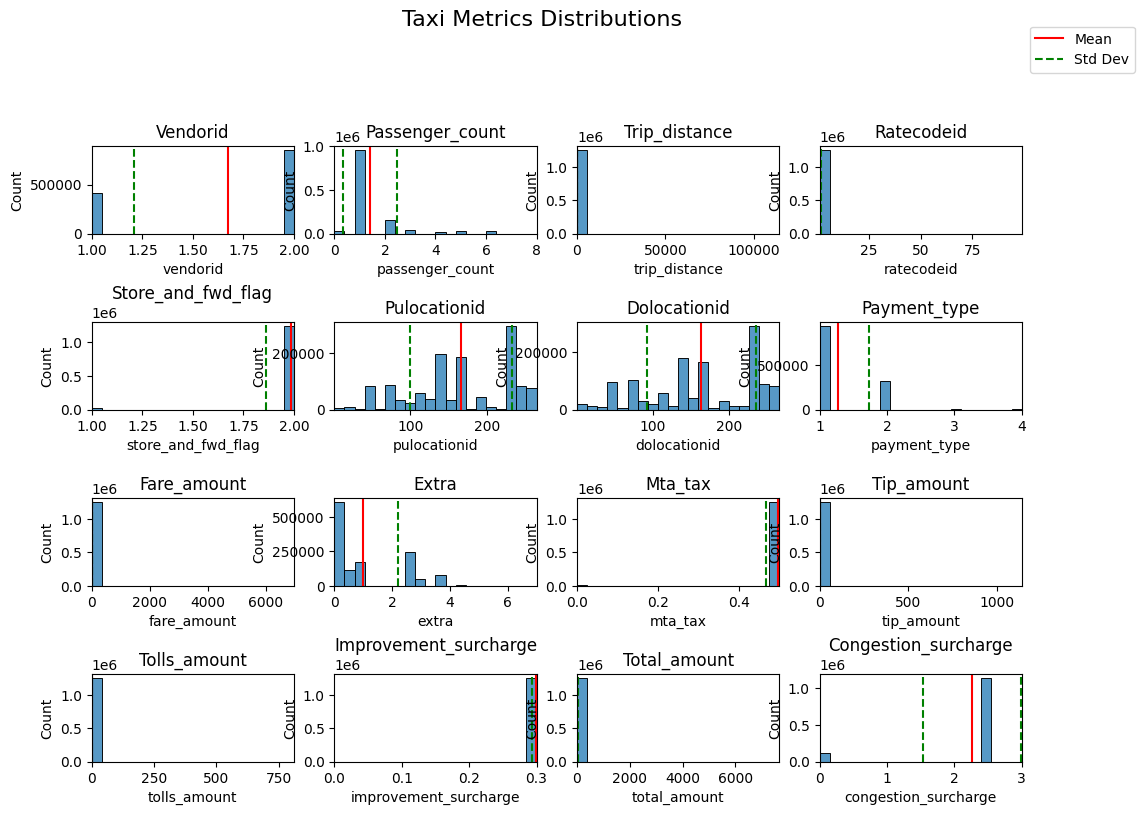

In [14]:
fig, axs = plt.subplots(4, 4, figsize=(12, 8))
bins = [20] * len(num_cols)

for i, column in enumerate(num_cols):
    taxi_var = taxi_df_orig[column]
    row = i // 4
    col = i % 4
    
    sns.histplot(taxi_var, bins=bins[i], ax=axs[row, col])
    axs[row, col].set_title(column.capitalize())
    
    # Set x-axis limits based on min and max values in the column
    axs[row, col].set_xlim(taxi_var.min(), taxi_var.max())
    
    axs[row, col].axvline(taxi_var.mean(), color='red', label='Mean')
    axs[row, col].axvline(taxi_var.mean() - taxi_var.std(), color='green', linestyle='--', label='Std Dev')
    axs[row, col].axvline(taxi_var.mean() + taxi_var.std(), color='green', linestyle='--')

# Add a single legend for all four plots
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1, 1), loc='right', ncol=1)

# Add a title for the whole figure
fig.suptitle('Taxi Metrics Distributions', fontsize=16, y=1.05)

# Add some padding between the subplots
plt.subplots_adjust(hspace=1)

# display the plot
plt.show()

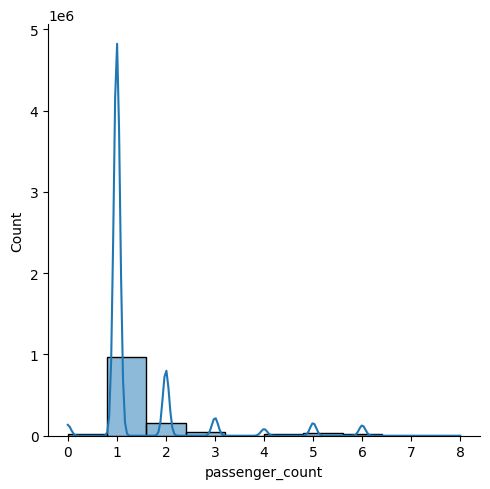

In [3]:
sns.displot(taxi_df_orig['passenger_count'], bins=10, kde=True)

# BIVARIATE ANALYSIS

### CORRELATION PLOTS

In [ ]:
plt.matshow(taxi_df_clean.corr())
plt.show()

In [ ]:
corr = taxi_df_clean.corr()
#corr_formatted = corr.map(lambda x: f'{x:.2f}')
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#Pair plots are nice but not for such a large dataset
#sns.pairplot(taxi_df_clean)

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = taxi_df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)